# Video_Game_Sales.ipynb

Predicting Global Sales: Build a regression model to predict the global sales of a video game based on features such as platform, genre, and publisher.

In [1]:
import pandas as pd

df = pd.read_csv("Video_Game_Sales.csv")

df.head()

# df.info()
# df.describe()

# Rank: The ranking of the video game.
# Name: The name of the video game.
# Platform: The gaming platform on which the game was released.
# Year: The release year of the game.
# Genre: The genre of the video game.
# Publisher: The publisher of the video game.
# NA_Sales, EU_Sales, JP_Sales, Other_Sales: Sales figures in North America, Europe, Japan, and other regions, respectively.
# Global_Sales: Total global sales of the video game.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# The 'Year' column has 271 missing values.
# The 'Publisher' column has 58 missing values.

# The 'Year' column represents release years for video games, 
# and using the median is often a good choice when dealing with time-related data.
df['Year'].fillna(df['Year'].median(), inplace=True)

# Fill missing 'Publisher' values with the most common publisher.
# Filling with a placeholder or the most common publisher can help maintain the integrity of your dataset.

# most_common_publisher = df['Publisher'].mode()[0]
# df['Publisher'].fillna(most_common_publisher, inplace=True)

# Fill missing 'Publisher' values with "Unknown"
df['Publisher'].fillna("Unknown", inplace=True)

# Check for duplicates
# print("Number of duplicate rows:", df.duplicated().sum())
# ^ Remove duplicates
# df = df.drop_duplicates()

# Identify and handle outliers using a threshold
# threshold = 10  # Set your threshold
# df = df[df['Global_Sales'] <= threshold]

# Reviewing Categorical Values:
# Check unique values in categorical columns ('Platform,' 'Genre,' 'Publisher') and handle any inconsistencies or misspellings.
# print(df['Platform'].unique())
# print(df['Genre'].unique())
# print(df['Publisher'].unique())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN across the entire DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Descriptive statistics
# df.describe(): Provides descriptive statistics for numerical columns.
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


/Users/joshuaconde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


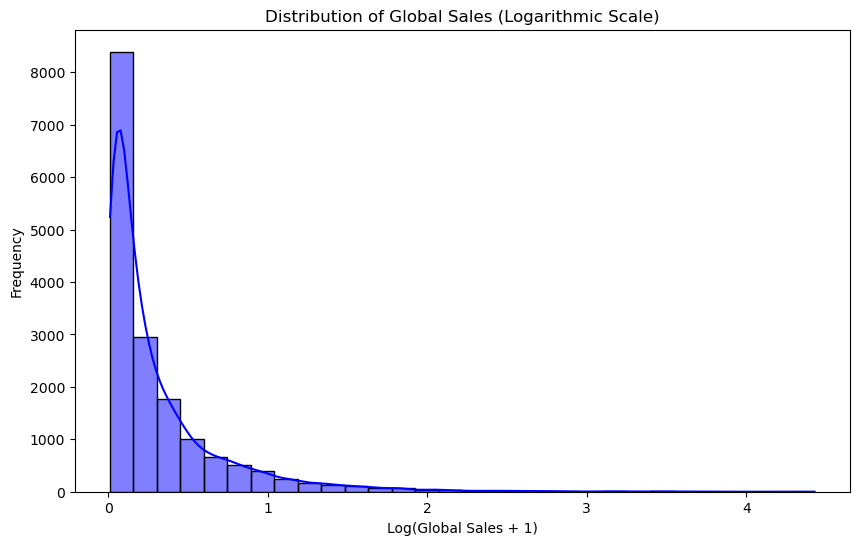

/Users/joshuaconde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


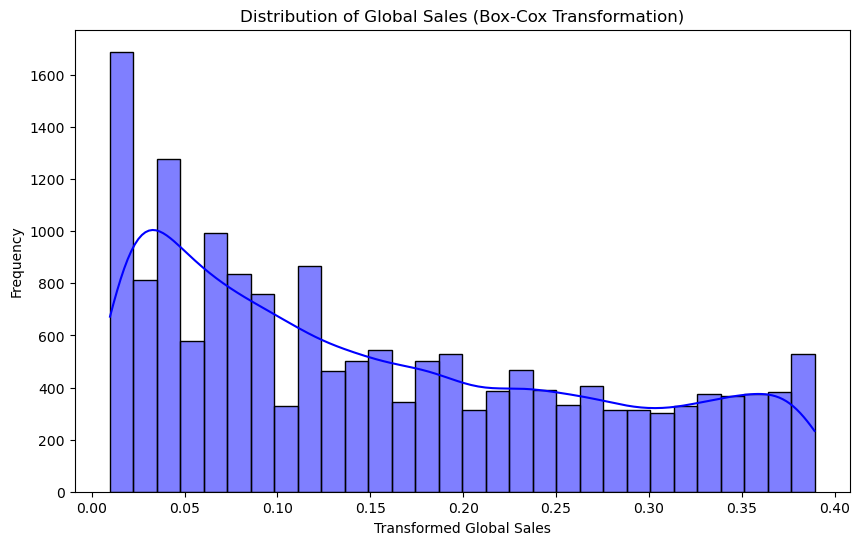

In [4]:
# Distribution of global sales
# sns.histplot(): Plots a histogram of the distribution of global sales.

# Logarithmic transformations are commonly used in cases of highly skewed data, 
# and the Box-Cox transformation is a more flexible approach that can handle a wider range of distributions.

# 1. Logarithmic Transformation:
# We've applied a logarithmic transformation to the 'Global_Sales' column before plotting, 
# as this helps to compress overwhelmingly high values and, in turn, reveals far more details in the "lower range."
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['Global_Sales'].dropna()), bins=30, kde=True, color='blue')
plt.title('Distribution of Global Sales (Logarithmic Scale)')
plt.xlabel('Log(Global Sales + 1)')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import boxcox

# 2. Box-Cox Transformation:
transformed_sales, lambda_value = boxcox(df['Global_Sales'].dropna() + 1)

plt.figure(figsize=(10, 6))
sns.histplot(transformed_sales, bins=30, kde=True, color='blue')
plt.title('Distribution of Global Sales (Box-Cox Transformation)')
plt.xlabel('Transformed Global Sales')
plt.ylabel('Frequency')
plt.show()

In [5]:
# print(df['Global_Sales'].unique())
# print(df['Global_Sales'].describe())

# The output you provided indicates that the 'Global_Sales' column has a highly skewed distribution, 
# as evidenced by the large difference between the mean and median, 
# as well as the maximum value being significantly higher than the majority of values. 
# Skewed distributions can often benefit from transformations to make the data more suitable for modeling.

# 1. Log Transformation:
# Log transformations are useful for reducing the impact of extreme values and stabilizing the variance.
# It is particularly effective when the data is right-skewed.
# It is straightforward to apply, and it works well when the data includes zero or very small values.

df['Global_Sales'] = np.log1p(df['Global_Sales'])

# 2. Box-Cox Transformation:
# The Box-Cox transformation is a family of power transformations that includes the log transformation as a special case.
# It requires data with strictly positive values; therefore, it's suitable for your dataset with positive sales values.
# The boxcox function from scipy.stats can be used for this transformation.

# df['Global_Sales_BoxCox'], _ = boxcox(df['Global_Sales'] + 1)  # Adding 1 to handle zero values

###

# Given the nature of this data, I'll go with the log transformation, as it's a commonly used choice for 
# handling right-skewed distributions and stabilizing variance. 

/Users/joshuaconde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaconde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


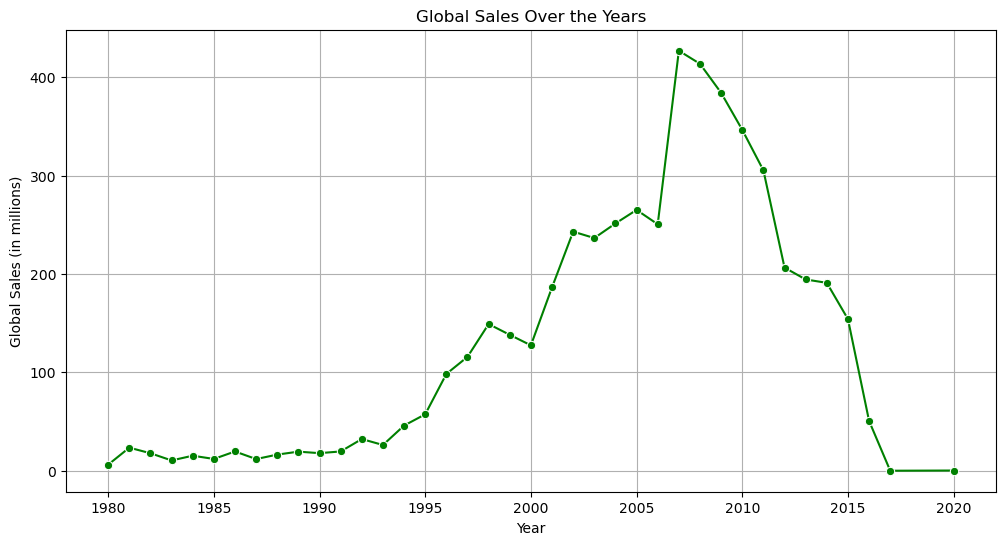

In [6]:
# 1. Sales over the years:
# sns.lineplot(): Shows the trend of global sales over the years.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=df.groupby('Year')['Global_Sales'].sum().reset_index(), marker='o', color='green')
plt.title('Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

# 2. Histogram of global sales over the years:
# plt.figure(figsize=(12, 6))
# sns.histplot(df.groupby('Year')['Global_Sales'].sum().reset_index(), bins=30, kde=True, color='blue')
# plt.title('Distribution of Global Sales Over the Years')
# plt.xlabel('Global Sales (in millions)')
# plt.ylabel('Frequency')
# plt.show()

# 3. Boxplot of global sales over the years:
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Global_Sales', data=df.groupby('Year')['Global_Sales'].sum().reset_index(), color='blue')
# plt.title('Boxplot of Global Sales Over the Years')
# plt.xlabel('Global Sales (in millions)')
# plt.show()

# print(df.groupby('Year')['Global_Sales'].sum())
# print(df.groupby('Year')['Global_Sales'].sum().describe())

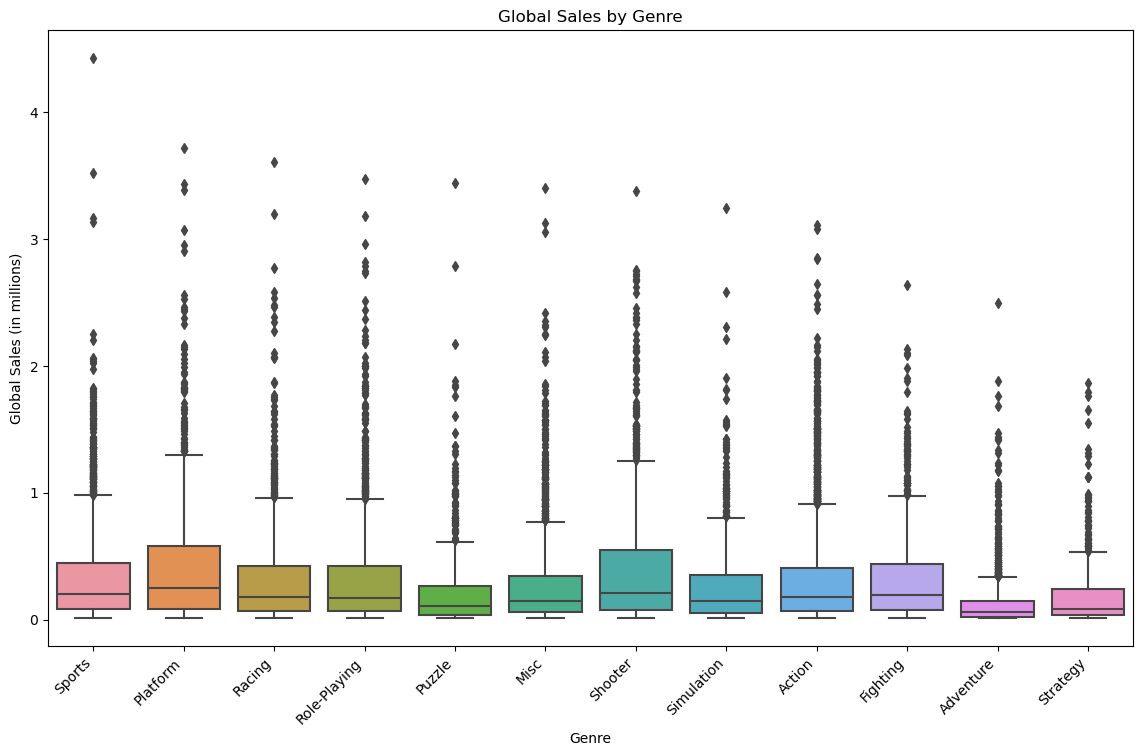

In [7]:
# Video Game Sales by Genre:
# sns.boxplot(): Displays a boxplot to visualize global sales distribution by genre.
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Unique values of global sales within each genre:
# for genre in df['Genre'].unique():
#     genre_sales = df[df['Genre'] == genre]['Global_Sales']
#     print(f"Genre: {genre}")
#     print(f"Unique values: {genre_sales.unique()}")
#     print(f"Summary statistics:\n{genre_sales.describe()}\n")

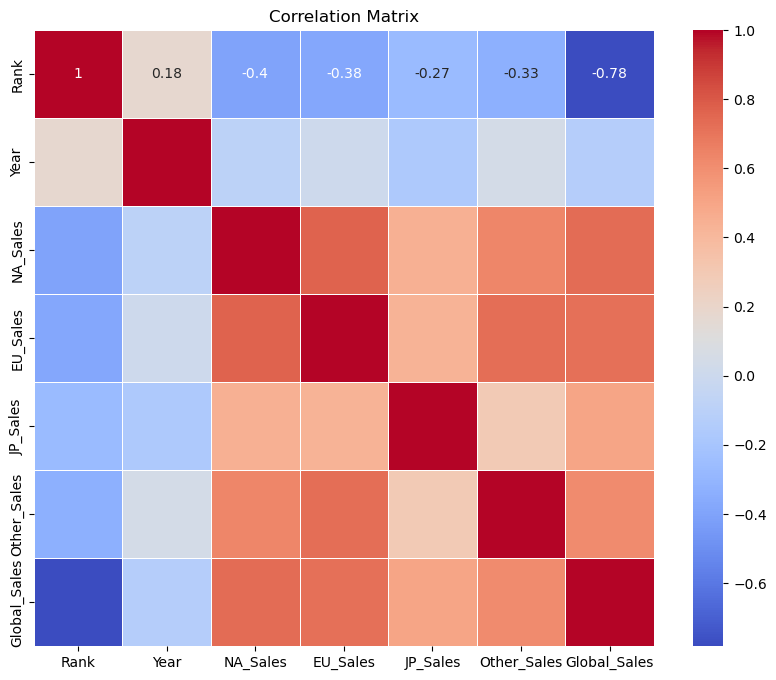

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Rank          1.000000  0.177526 -0.401362 -0.379123 -0.267785    -0.332986     -0.782860
Year          0.177526  1.000000 -0.091282  0.005824 -0.169432     0.040857     -0.129241
NA_Sales     -0.401362 -0.091282  1.000000  0.767727  0.449787     0.634737      0.734421
EU_Sales     -0.379123  0.005824  0.767727  1.000000  0.435584     0.726385      0.715730
JP_Sales     -0.267785 -0.169432  0.449787  0.435584  1.000000     0.290186      0.500473
Other_Sales  -0.332986  0.040857  0.634737  0.726385  0.290186     1.000000      0.610446
Global_Sales -0.782860 -0.129241  0.734421  0.715730  0.500473     0.610446      1.000000


In [8]:
# Correlation Matrix:
# sns.heatmap(): Creates a heatmap to visualize the correlation matrix of numerical features.
df_temp = df.drop(columns=['Name', 'Platform', 'Genre', 'Publisher'], axis=1)
plt.figure(figsize=(10, 8))
correlation_matrix = df_temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Text Correlation Matrix:
df_temp = df.drop(columns=['Name', 'Platform', 'Genre', 'Publisher'], axis=1)
correlation_matrix = df_temp.corr()
# Convert to text-based format
correlation_matrix_text = correlation_matrix.to_string()
# Print or store the text-based correlation matrix
print(correlation_matrix_text)

In [9]:
# 1. Strong Negative Correlation with Rank:
# 1A. Rank has a strong negative correlation with Global_Sales (-0.782860). 
# ^ This suggests that as the rank of a game increases (i.e., as it becomes less popular or sells less), 
# ^ global sales tend to decrease. You might want to consider including Rank as a feature in your model.

# 2. Moderate Positive Correlations:
# 2A. NA_Sales (0.734421), EU_Sales (0.715730), and Other_Sales (0.610446) have moderate positive correlations
# ^ with Global_Sales. This indicates that games selling well in one region tend to have higher global sales.

# 3. Year and Genre Impact:
# 3A. Year has a relatively weak negative correlation with Global_Sales (-0.129241). 
# ^ This suggests that, on average, more recent games might have slightly lower global sales. 
# ^ You could explore this relationship further.
# ^ Explore the impact of Genre on global sales, even though it's not included in the correlation matrix. 
# ^ Different genres might have varying degrees of influence on sales.

# 4. JP_Sales and Other_Sales Impact:
# 4A. JP_Sales (0.500473) has a moderate positive correlation with Global_Sales, 
# ^ indicating that sales in the Japanese market positively influence global sales.
# ^ Other_Sales (0.610446) also has a moderate positive correlation with Global_Sales.

###

# Remember that correlation does not imply causation, and these are just initial observations. 
# It's crucial to validate these insights through exploratory data analysis (EDA) 
# and experimentation with different features and model configurations. 
# Adjust your model iteratively based on performance metrics and domain knowledge.

In [10]:
# Considering our goal of building a regression model to predict global sales, 
# we'd benefit the most from (our) using the logarithmically transformed Global_Sales. 
# This transformation tends to be useful when the distribution of the target variable is skewed, 
# and it can help in making the relationship between features and the target variable more linear.

# The correlation coefficient between Global_Sales and other variables is also high, 
# which indicates that the logarithmic transformation maintains strong relationships while potentially improving the linearity.

# Using the Global_Sales column for regression might be a good choice, 
# especially if it leads to a more normally distributed target variable and improves the performance of your model.

In [11]:
# To build a regression model, you need to encode categorical variables, handle missing values, 
# and split the data into features (X) and the target variable (y).

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Let's start with (one-hot) encoding the categorical variables:
# The drop_first=True parameter is used to avoid the "dummy variable trap."
# df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)
# df_encoded = df

df.head() # df_encoded.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,4.427717
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,3.719409
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,3.606041
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,3.526361
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,3.477232


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# 2. Define features (X) and target variable (y):
X = df.drop(columns=['Name', 'Global_Sales'], axis=1) # Features
y = df['Global_Sales'] # Target variable

# Display the first few rows of X and y
# print("Features (X):")
# print(X.head())
# print("\nTarget Variable (y):")
# print(y.head())

In [14]:
# 3. Define numerical and categorical features:
numeric_features = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Platform', 'Genre', 'Publisher']

In [15]:
# 4. Define preprocessing steps for numerical features:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing values with median
    ('scaler', StandardScaler()) # Standardize features by removing the mean and scaling to unit variance
])

# 5. Define preprocessing steps for categorical features:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical variables
])

In [16]:
# 6. Combine preprocessing steps for numerical and categorical features:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [17]:
# 7. Define models:
models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor())
]

In [18]:
# 8. Create pipelines for each model:
pipelines = {}
for name, model in models:
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [19]:
# 9. Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

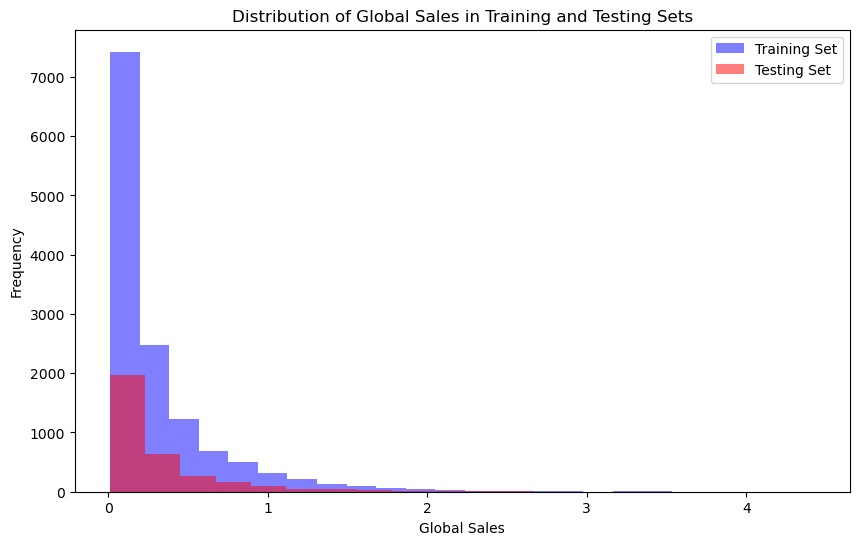

Distribution of Global Sales in Training Set:
count    13278.000000
mean         0.305389
std          0.392853
min          0.009950
25%          0.058269
50%          0.157004
75%          0.385262
max          3.719409
Name: Global_Sales, dtype: float64

Distribution of Global Sales in Testing Set:
count    3320.000000
mean        0.310991
std         0.408515
min         0.009950
25%         0.058269
50%         0.157004
75%         0.392042
max         4.427717
Name: Global_Sales, dtype: float64


In [20]:
# 9A. Data Distribution: 
# You can visualize the distribution of the target variable (Global_Sales) in both the training and testing sets using histograms or density plots. 
# This helps you identify any discrepancies or patterns that might affect the model's performance.

plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=20, alpha=0.5, color='blue', label='Training Set')
plt.hist(y_test, bins=20, alpha=0.5, color='red', label='Testing Set')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales in Training and Testing Sets')
plt.legend()
plt.show()

###

# Describe the distribution of the target variable:
train_sales_description = y_train.describe()
test_sales_description = y_test.describe()

print("Distribution of Global Sales in Training Set:")
print(train_sales_description)

print("\nDistribution of Global Sales in Testing Set:")
print(test_sales_description)

In [21]:
# 9B. ^ The summary statistics of the distribution of global sales in both the training and testing sets indicate that the mean and standard deviation
# are relatively similar between the two sets. However, there is a notable difference in the maximum value, 
# with the maximum global sales in the testing set being higher than in the training set. This difference could potentially impact the model's performance, 
# especially if the model has not been trained on instances with such high global sales values.

In [22]:
# 10. Train and evaluate models using cross-validation:
results = {}
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[name] = cv_scores

In [23]:
# 11. Display cross-validation results:
for name, scores in results.items():
    print(f"{name} MAE: {scores.mean():.4f} +/- {scores.std():.4f}")

print("\nresults:", results)

RandomForest MAE: -0.0003 +/- 0.0001
GradientBoosting MAE: -0.0018 +/- 0.0001

results: {'RandomForest': array([-0.00022182, -0.00035866, -0.00026674, -0.00028359, -0.00055877]), 'GradientBoosting': array([-0.00177805, -0.00178522, -0.00176973, -0.00172962, -0.00191018])}


In [24]:
# 12. Fit the best model on the training data:

# Find the model with the lowest mean cross-validation MAE score
best_model_name = min(results, key=lambda x: results[x].mean())
best_model = pipelines[best_model_name]

# Fit the best model on the training data
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rank', 'Year', 'NA_Sales',
                                                   'EU_Sales', 'JP_Sales',
                                                   'Other_Sales']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('model', GradientBoostingRegressor())])

In [25]:
# 13. Evaluate the best model on the testing data:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model MAE: {mae:.4f}")
print(f"Best Model MSE: {mse:.4f}")
print(f"Best Model R-squared: {r2:.4f}")

Best Model MAE: 0.0020
Best Model MSE: 0.0002
Best Model R-squared: 0.9990


In [26]:
# 13A. ^ These metrics suggest that the model performs very well on the testing data, 
# with very low errors and a high R-squared value indicating that the model explains most of the variance in the target variable. 
# This indicates that the model is a good fit for the data and performs well in making predictions.